In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [1]:
%load_ext autoreload
%autoreload 2

1. data Loading 
2. profiling 
3. write your analysis of data 
4. Nan Imputation 
5. handle the normalisation
6, multi collinatery 
7. build a model 
8. save it 
9. model acuurancy 
10 . 10 Test case 



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os, sys
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks/pip', nb_path)
sys.path.insert(0,nb_path)

In [4]:
pip install  https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 10.9 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 36.5 MB/s 
     |████████████████████████████████| 102 kB 8.1 MB/s 
     |████████████████████████████████| 675 kB 40.2 MB/s 
     |████████████████████████████████| 4.7 MB 33.8 MB/s 
     |████████████████████████████████| 63 kB 944 kB/s 
     |████████████████████████████████| 812 kB 32.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=a050c06104a4aff64d5109945bd40441180719a6fde0346814d198547958591c
  Stored in directory: /tmp/pip-ephem-wheel-cache-lzjdxs14/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8234e9febceb7e1944a477114e3e35125f71a8ca8e353556f81395781b92252d
  Stored in directory: /roo

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV , LinearRegression 
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import numpy as np
%matplotlib inline
sns.set()

In [11]:
cd /content/drive/MyDrive/GIT_space/PredictiveMaintenance/

/content/drive/MyDrive/GIT_space/PredictiveMaintenance


In [12]:
from logger_class import log

In [13]:
obj_log = log("Linearregression")
lg = obj_log.get_logger() 

In [14]:
df = pd.read_csv("Data .csv")

In [15]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile.to_file("Profile_data.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
# check cat value 
df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF']].nunique()

Machine failure    2
TWF                2
HDF                2
PWF                2
OSF                2
RNF                2
dtype: int64

In [ ]:
df.isnull().sum() # No NUll value found 

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [16]:
# droping the uid and product id and UDI
df1= df.drop(["UDI", "Product ID"],axis = 1)

In [17]:
# map the type
df1['Type'] = df1['Type'].map({"L" : 0 , "M" : 1 , "H" : 2 })

In [18]:
df1['Type'].unique()

array([1, 0, 2])

In [19]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [20]:
# my target column 
y = df1['Air temperature [K]']

In [21]:
#my feature columns 
x = df1.drop(['Air temperature [K]'], axis = 1 )

In [22]:
x

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,308.4,1604,29.5,14,0,0,0,0,0,0
9996,2,308.4,1632,31.8,17,0,0,0,0,0,0
9997,1,308.6,1645,33.4,22,0,0,0,0,0,0
9998,2,308.7,1408,48.5,25,0,0,0,0,0,0


In [23]:
## we will need to standarise  the variable as the temperature , torque etc is on different scale 

In [24]:
scaler = StandardScaler()

In [25]:
arr = scaler.fit_transform(x)

In [26]:
arr

array([[ 0.74441274, -0.94735989,  0.06818514, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.74530658, -0.879959  , -0.72947151, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.74530658, -1.01476077, -0.22744984, ..., -0.09793424,
        -0.09948362, -0.04363046],
       ...,
       [ 0.74441274, -0.94735989,  0.59251888, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [ 2.23413206, -0.879959  , -0.72947151, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [ 0.74441274, -0.879959  , -0.2162938 , ..., -0.09793424,
        -0.09948362, -0.04363046]])

In [27]:
# profile report after scaling 
df2 = pd.DataFrame(arr, columns=x.columns)


In [ ]:
profile_after.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
df2

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0.744413,-0.947360,0.068185,0.282200,-1.695984,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-0.745307,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-0.745307,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-0.745307,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-0.745307,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.744413,-1.082162,0.363820,-1.052012,-1.476034,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9996,2.234132,-1.082162,0.520005,-0.821283,-1.428902,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9997,0.744413,-0.947360,0.592519,-0.660777,-1.350349,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
9998,2.234132,-0.879959,-0.729472,0.854005,-1.303217,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif_df = pd.DataFrame()
vif_df["Feature"] = x.columns


In [32]:
vif_df['vif']= [variance_inflation_factor(arr,i) for i in range(arr.shape[1])]

In [33]:
vif_df

,Feature,vif
0,Type,1.003726
1,Process temperature [K],1.004920
2,Rotational speed [rpm],5.171728
3,Torque [Nm],5.236158
4,Tool wear [min],1.039958
5,Machine failure,11.831609
6,TWF,2.433879
7,HDF,4.597163
8,PWF,3.624287
9,OSF,3.348866


In [36]:
# here we can see that machine failure is a more than 10 
# so we drop  machine as its is just a represnation of all the othe failure 
df_count =df[df['Machine failure']==1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

In [44]:
df_count

,TWF,HDF,PWF,OSF,RNF
0,293,224,244,241,338
1,46,115,95,98,1


In [46]:
# droping all the duplicate 
df3 = df2.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1)

In [48]:
df3

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,0.744413,-0.947360,0.068185,0.282200,-1.695984,-0.187322
1,-0.745307,-0.879959,-0.729472,0.633308,-1.648852,-0.187322
2,-0.745307,-1.014761,-0.227450,0.944290,-1.617430,-0.187322
3,-0.745307,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322
4,-0.745307,-0.879959,-0.729472,0.001313,-1.554588,-0.187322
...,...,...,...,...,...,...
9995,0.744413,-1.082162,0.363820,-1.052012,-1.476034,-0.187322
9996,2.234132,-1.082162,0.520005,-0.821283,-1.428902,-0.187322
9997,0.744413,-0.947360,0.592519,-0.660777,-1.350349,-0.187322
9998,2.234132,-0.879959,-0.729472,0.854005,-1.303217,-0.187322


In [49]:
x = df3
y = df1["Air temperature [K]"]

In [50]:
x_train,x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state =100)

In [51]:
model = LinearRegression()

In [52]:
model.fit(x_train,y_train)

LinearRegression()

In [53]:
model.coef_

array([ 0.00538365,  1.7392612 , -0.02490871, -0.04571816, -0.00657343,
        0.11161492])

In [54]:
cof_df = pd.DataFrame()
cof_df["feature"] = x.columns
cof_df["coef_"] = model.coef_

In [55]:
cof_df

,feature,coef_
0,Type,0.005384
1,Process temperature [K],1.739261
2,Rotational speed [rpm],-0.024909
3,Torque [Nm],-0.045718
4,Tool wear [min],-0.006573
5,Machine failure,0.111615


In [56]:
model.score(x_test,y_test)

0.7917416248234623

In [57]:
df3

,Type,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,0.744413,-0.947360,0.068185,0.282200,-1.695984,-0.187322
1,-0.745307,-0.879959,-0.729472,0.633308,-1.648852,-0.187322
2,-0.745307,-1.014761,-0.227450,0.944290,-1.617430,-0.187322
3,-0.745307,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322
4,-0.745307,-0.879959,-0.729472,0.001313,-1.554588,-0.187322
...,...,...,...,...,...,...
9995,0.744413,-1.082162,0.363820,-1.052012,-1.476034,-0.187322
9996,2.234132,-1.082162,0.520005,-0.821283,-1.428902,-0.187322
9997,0.744413,-0.947360,0.592519,-0.660777,-1.350349,-0.187322
9998,2.234132,-0.879959,-0.729472,0.854005,-1.303217,-0.187322


In [58]:
pickle.dump(model, open("Sc_model_lr_model.pickle", "wb"))

In [ ]:
import statsmodels.api as sm

In [59]:
x = df3
y = df1['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

In [ ]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     5587.
Date:                 Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                         17:46:56   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.755e+04
Df Residuals:                     9993   BIC:                         2.760e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.565      0.572      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.146      0.000       1.729       1.767
Rotational speed [rpm]     -0.0194      0.021     -0.947      0.344      -0.060       0.021
Torque [Nm]                -0.0411      0.021     -1.965      0.049      -0.082   -9.45e-05
Tool wear [min]            -0.0076      0.010     -0.790      0.430      -0.027       0.011
Machine failure             0.1099      0.010     10.780      0.000       0.090       0.130
==============================================================================
Omnibus:                      691.694   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.988
Skew:                          -0.109   Prob(JB):                     4.27e-56
Kurtosis:                       2.249   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     5587.
Date:                 Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                         17:46:56   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.755e+04
Df Residuals:                     9993   BIC:                         2.760e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.565      0.572      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.146      0.000       1.729       1.767
Rotational speed [rpm]     -0.0194      0.021     -0.947      0.344      -0.060       0.021
Torque [Nm]                -0.0411      0.021     -1.965      0.049      -0.082   -9.45e-05
Tool wear [min]            -0.0076      0.010     -0.790      0.430      -0.027       0.011
Machine failure             0.1099      0.010     10.780      0.000       0.090       0.130
==============================================================================
Omnibus:                      691.694   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.988
Skew:                          -0.109   Prob(JB):                     4.27e-56
Kurtosis:                       2.249   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

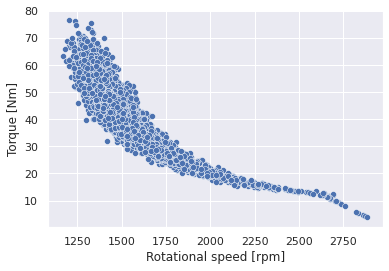

In [66]:
sns.scatterplot(x =df["Rotational speed [rpm]"], y = df['Torque [Nm]'])

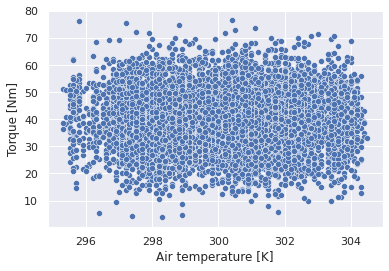

In [67]:
sns.scatterplot(x =df["Air temperature [K]"], y = df['Torque [Nm]'])

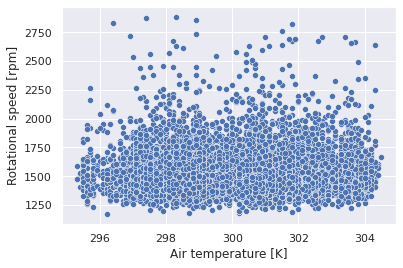

In [68]:
sns.scatterplot(x =df["Air temperature [K]"], y = df["Rotational speed [rpm]"])

In [81]:
df4 = df[df3.columns]
df4['Type'] = df4['Type'].map({"L" : 0 , "M" : 1 , "H" : 2 })

In [82]:
#droping "Rotational speed [rpm]" AS THE P VALUE IS 0.344
X = df4.drop(["Rotational speed [rpm]"], axis = 1)

In [83]:
y = df['Air temperature [K]']

In [84]:
#using standarrd scaler again as we have droped few values after anaylsis 

scaler_after  = StandardScaler()

In [96]:
pickle.dump(scaler_after, open("Scaler_after.pickle", "wb"))

In [85]:
arr = scaler_after.fit_transform(X)

In [86]:
df4 = pd.DataFrame(arr,columns = X.columns)

In [87]:
model_after = LinearRegression()

In [88]:
x= df4
y= df["Air temperature [K]"]

x_train,x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.25, random_state =100)

In [89]:
model_after.fit(x_train,y_train)

LinearRegression()

In [91]:
model_after.coef_

array([ 0.00547166,  1.73929732, -0.02355665, -0.00624807,  0.10838571])

In [93]:
cof_df = pd.DataFrame()
cof_df["feature"] = x.columns
cof_df["coef_"] = model_after.coef_
cof_df

,feature,coef_
0,Type,0.005472
1,Process temperature [K],1.739297
2,Torque [Nm],-0.023557
3,Tool wear [min],-0.006248
4,Machine failure,0.108386


In [97]:
pickle.dump(model_after, open("model_after_model.pickle", "wb"))

In [94]:
# using stats model 
x = df4
y = df['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                     6704.
Date:                 Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                         18:11:17   Log-Likelihood:                -13766.
No. Observations:                10000   AIC:                         2.754e+04
Df Residuals:                     9994   BIC:                         2.759e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Type                       -0.0054      0.010     -0.561      0.575      -0.024       0.013
Process temperature [K]     1.7482      0.010    182.145      0.000       1.729       1.767
Torque [Nm]                -0.0236      0.010     -2.410      0.016      -0.043      -0.004
Tool wear [min]            -0.0073      0.010     -0.757      0.449      -0.026       0.012
Machine failure             0.1074      0.010     10.911      0.000       0.088       0.127
==============================================================================
Omnibus:                      691.848   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.958
Skew:                          -0.109   Prob(JB):                     4.33e-56
Kurtosis:                       2.249   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
x = df4.drop(["Tool wear [min]","Type" ], axis = 1)
y = df['Air temperature [K]']
X = sm.add_constant(x)
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Air temperature [K]   R-squared:                       0.770
Model:                             OLS   Adj. R-squared:                  0.770
Method:                  Least Squares   F-statistic:                 1.117e+04
Date:                 Wed, 02 Feb 2022   Prob (F-statistic):               0.00
Time:                         18:13:17   Log-Likelihood:                -13767.
No. Observations:                10000   AIC:                         2.754e+04
Df Residuals:                     9996   BIC:                         2.757e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     300.0049      0.010   3.13e+04      0.000     299.986     300.024
Process temperature [K]     1.7482      0.010    182.172      0.000       1.729       1.767
Torque [Nm]                -0.0234      0.010     -2.395      0.017      -0.043      -0.004
Machine failure             0.1068      0.010     10.921      0.000       0.088       0.126
==============================================================================
Omnibus:                      692.742   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.272
Skew:                          -0.109   Prob(JB):                     3.70e-56
Kurtosis:                       2.248   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""